# Practice Learning Activity 4 (Fine-tune cloud-based LLM models using a web-based IDE)

#### **Case Scenario:** 
>
> After successfully preparing and transforming the data, CoffeePro is now ready to take the next step in their journey toward leveraging AI for personalized customer experiences. Management has decided to use Google AI Studio to fine-tune a Google Gemini Pro instance for the virtual agent. This model will form the backbone of their "Virtual Coffee Concierge," delivering tailored coffee recommendations and expert brewing advice.
>
>As the AI developer, your role is to upload the prepared dataset into Google AI Studio and fine-tune the Gemini Pro instance. The dataset contains sample inputs (e.g., customer preferences, coffee origin, roast degree, brew method) and desired outputs (e.g., coffee recommendations, brewing guides).
>
>Fine-tuning this model will require you to ensure that the dataset aligns with the format required by Google AI Studio (e.g., a CSV file with clearly defined input and output columns).
>


We've done a lot of work, it's time to finally get into the actual AI development...

---

### Pre-requisites: 
- [Create a Google (GMail) account](../learning-files/ailtk-googleaistudio-howto.ipynb).

#### (a) Fine-tune a Google Gemini instance using Google AI Studio



1. Login with your Google Account to <a href="#" onclick="window.open('https://aistudio.google.com', '_blank', 'width=800,height=600'); return false;">Google AI Studio</a>


    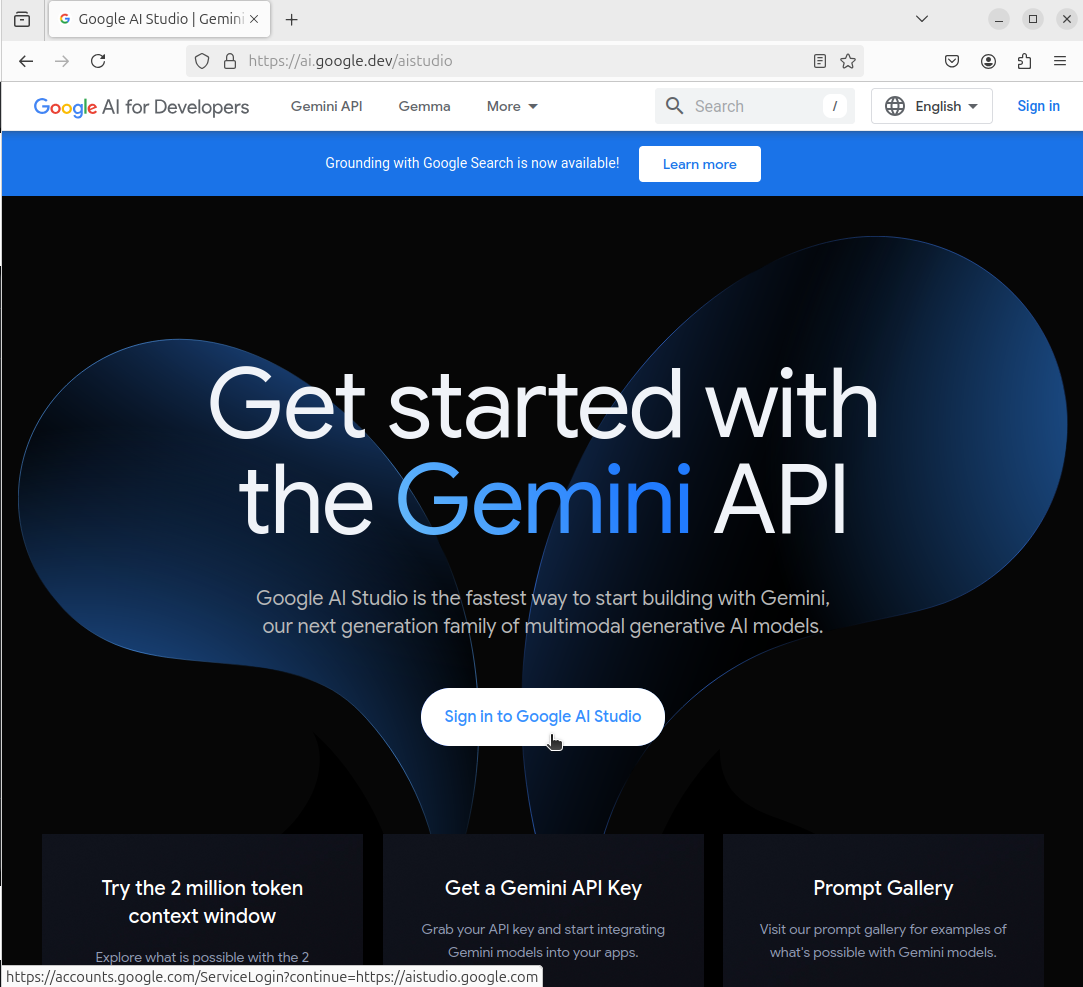

2. Upon logging in, navigate to "New Tuned Model" in the sidebar (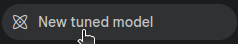).

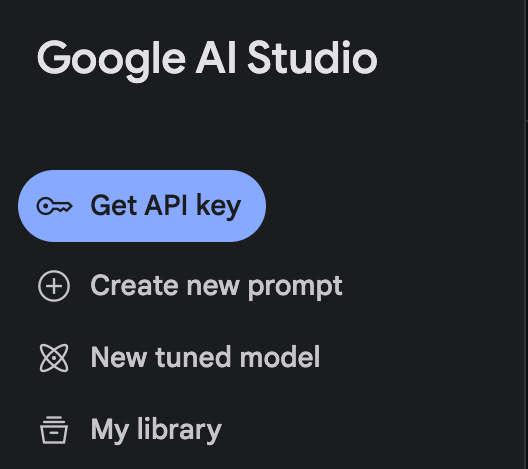

3.  Click "Import" (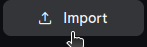) to upload your dataset for fine-tuning.

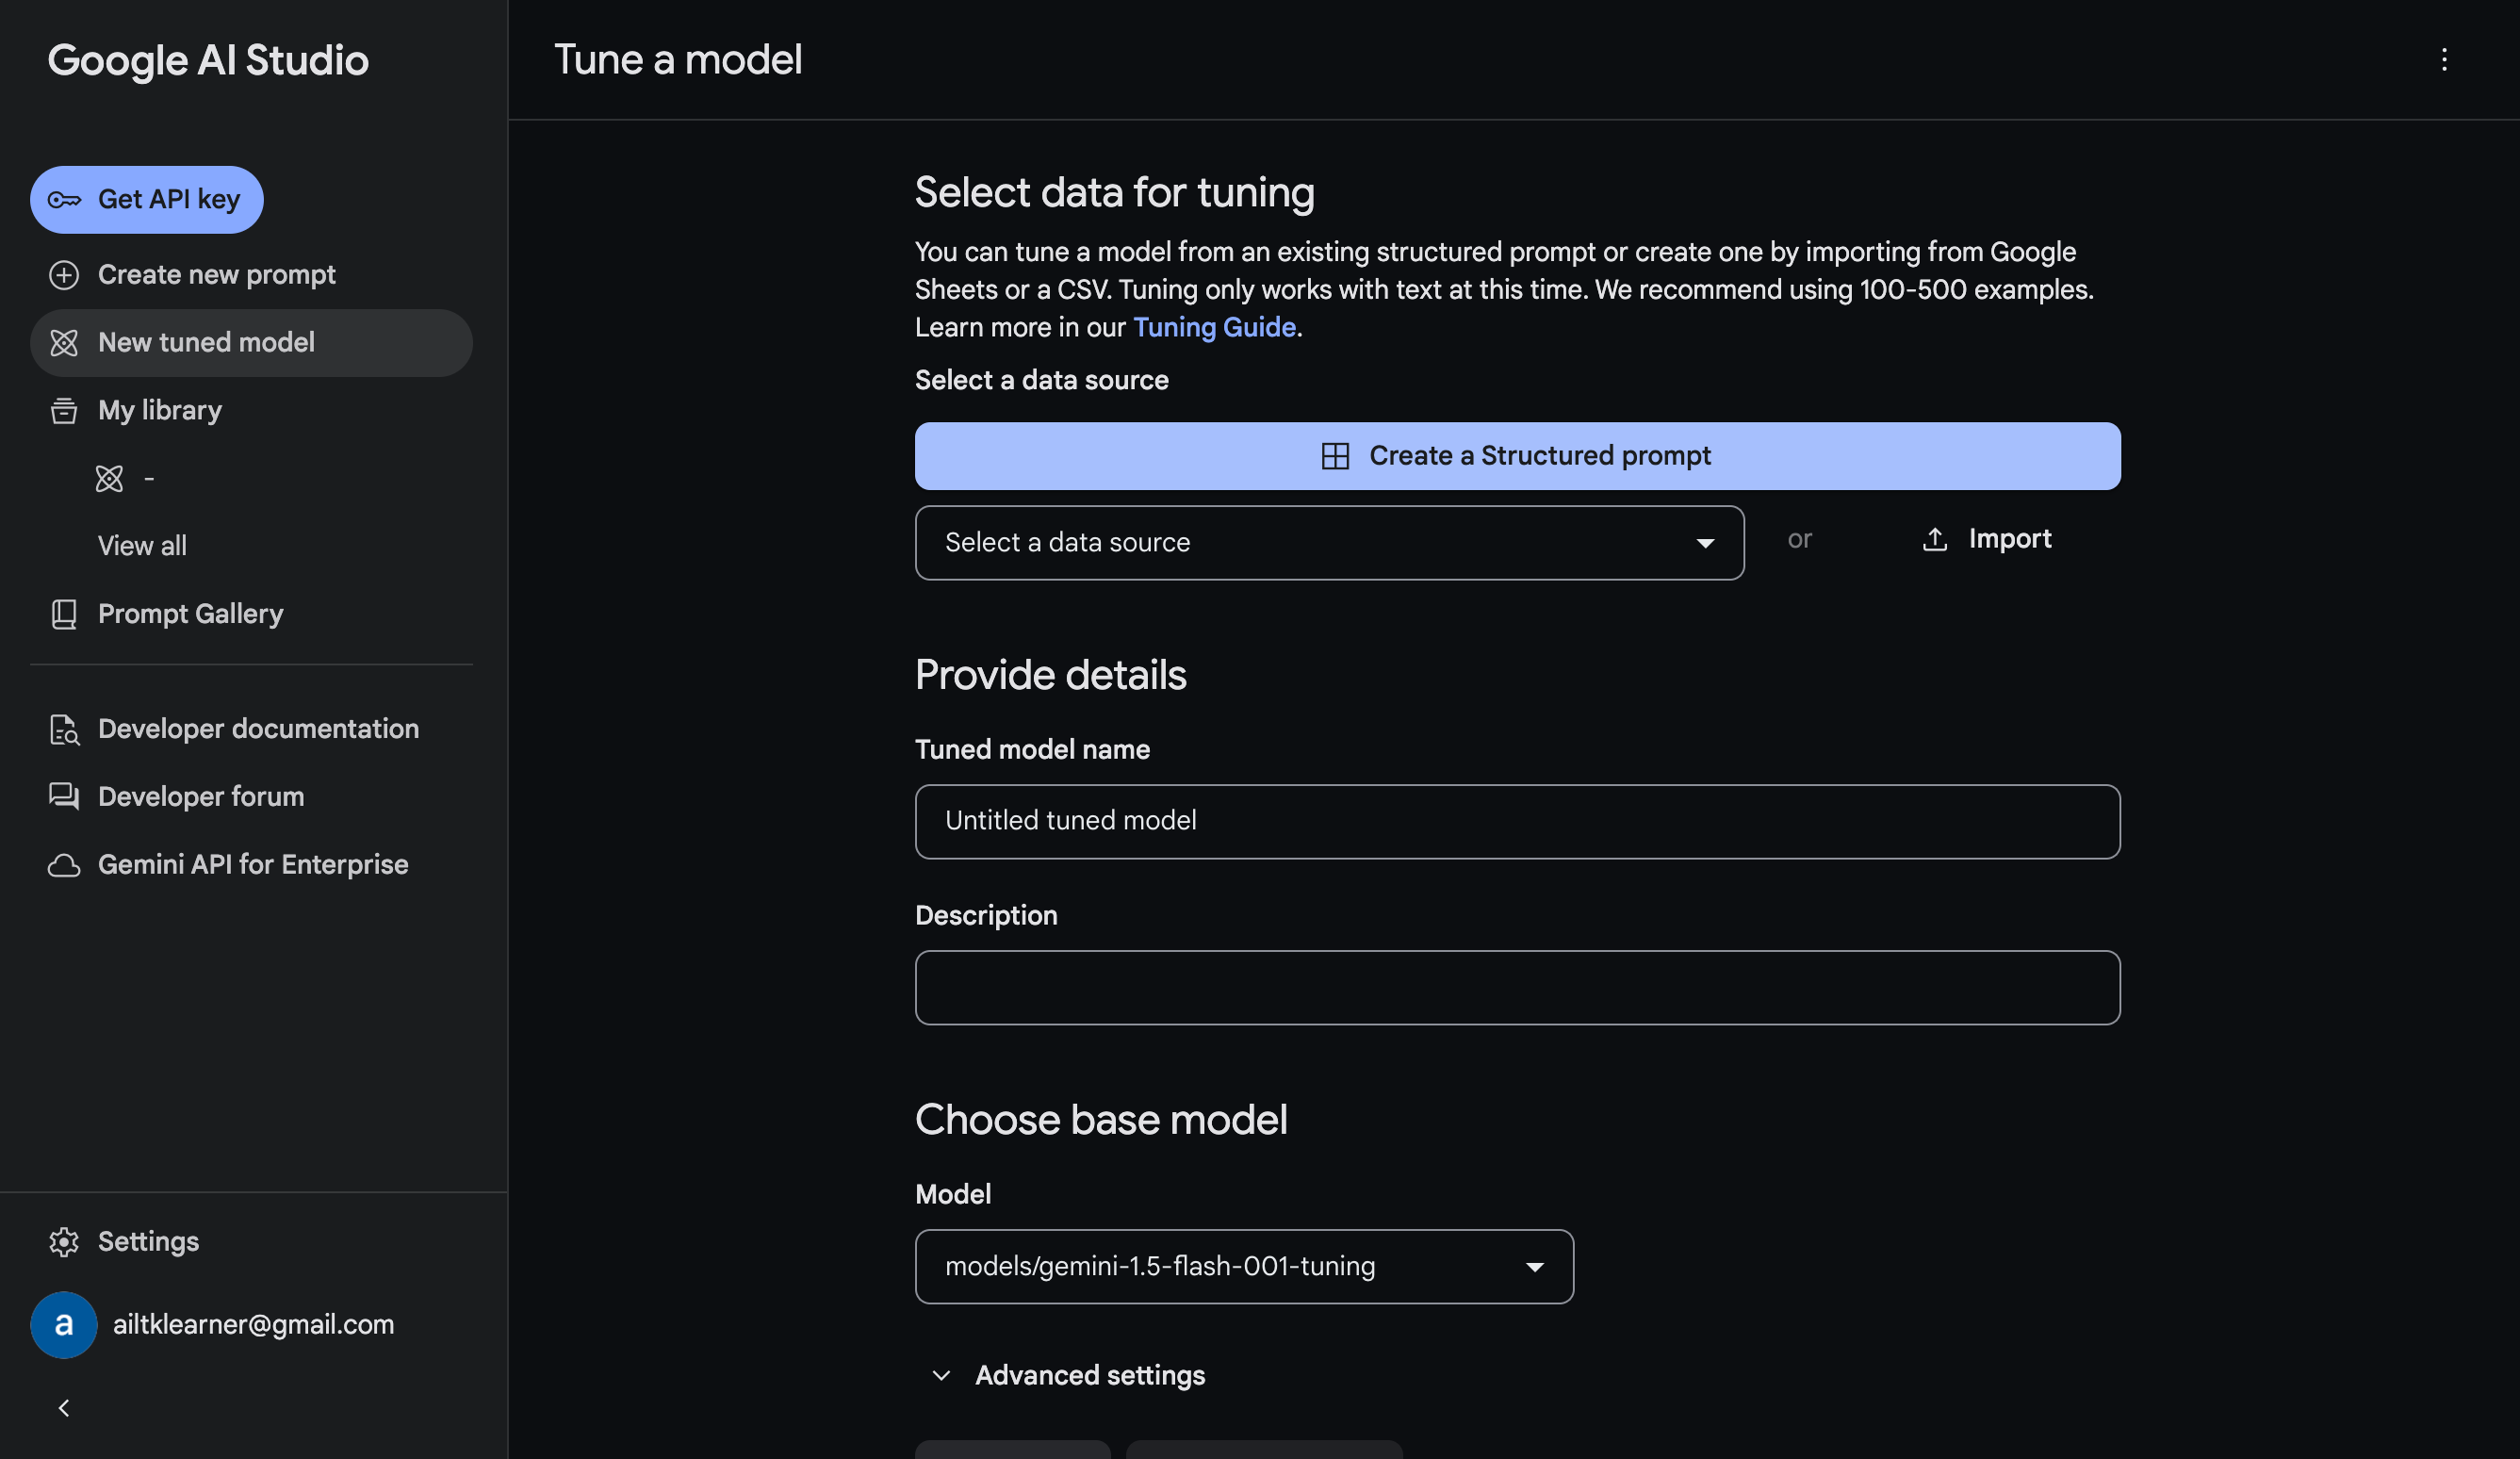

4. Navigate to the "Upload" (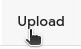) tab and select "Browse" (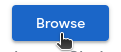).

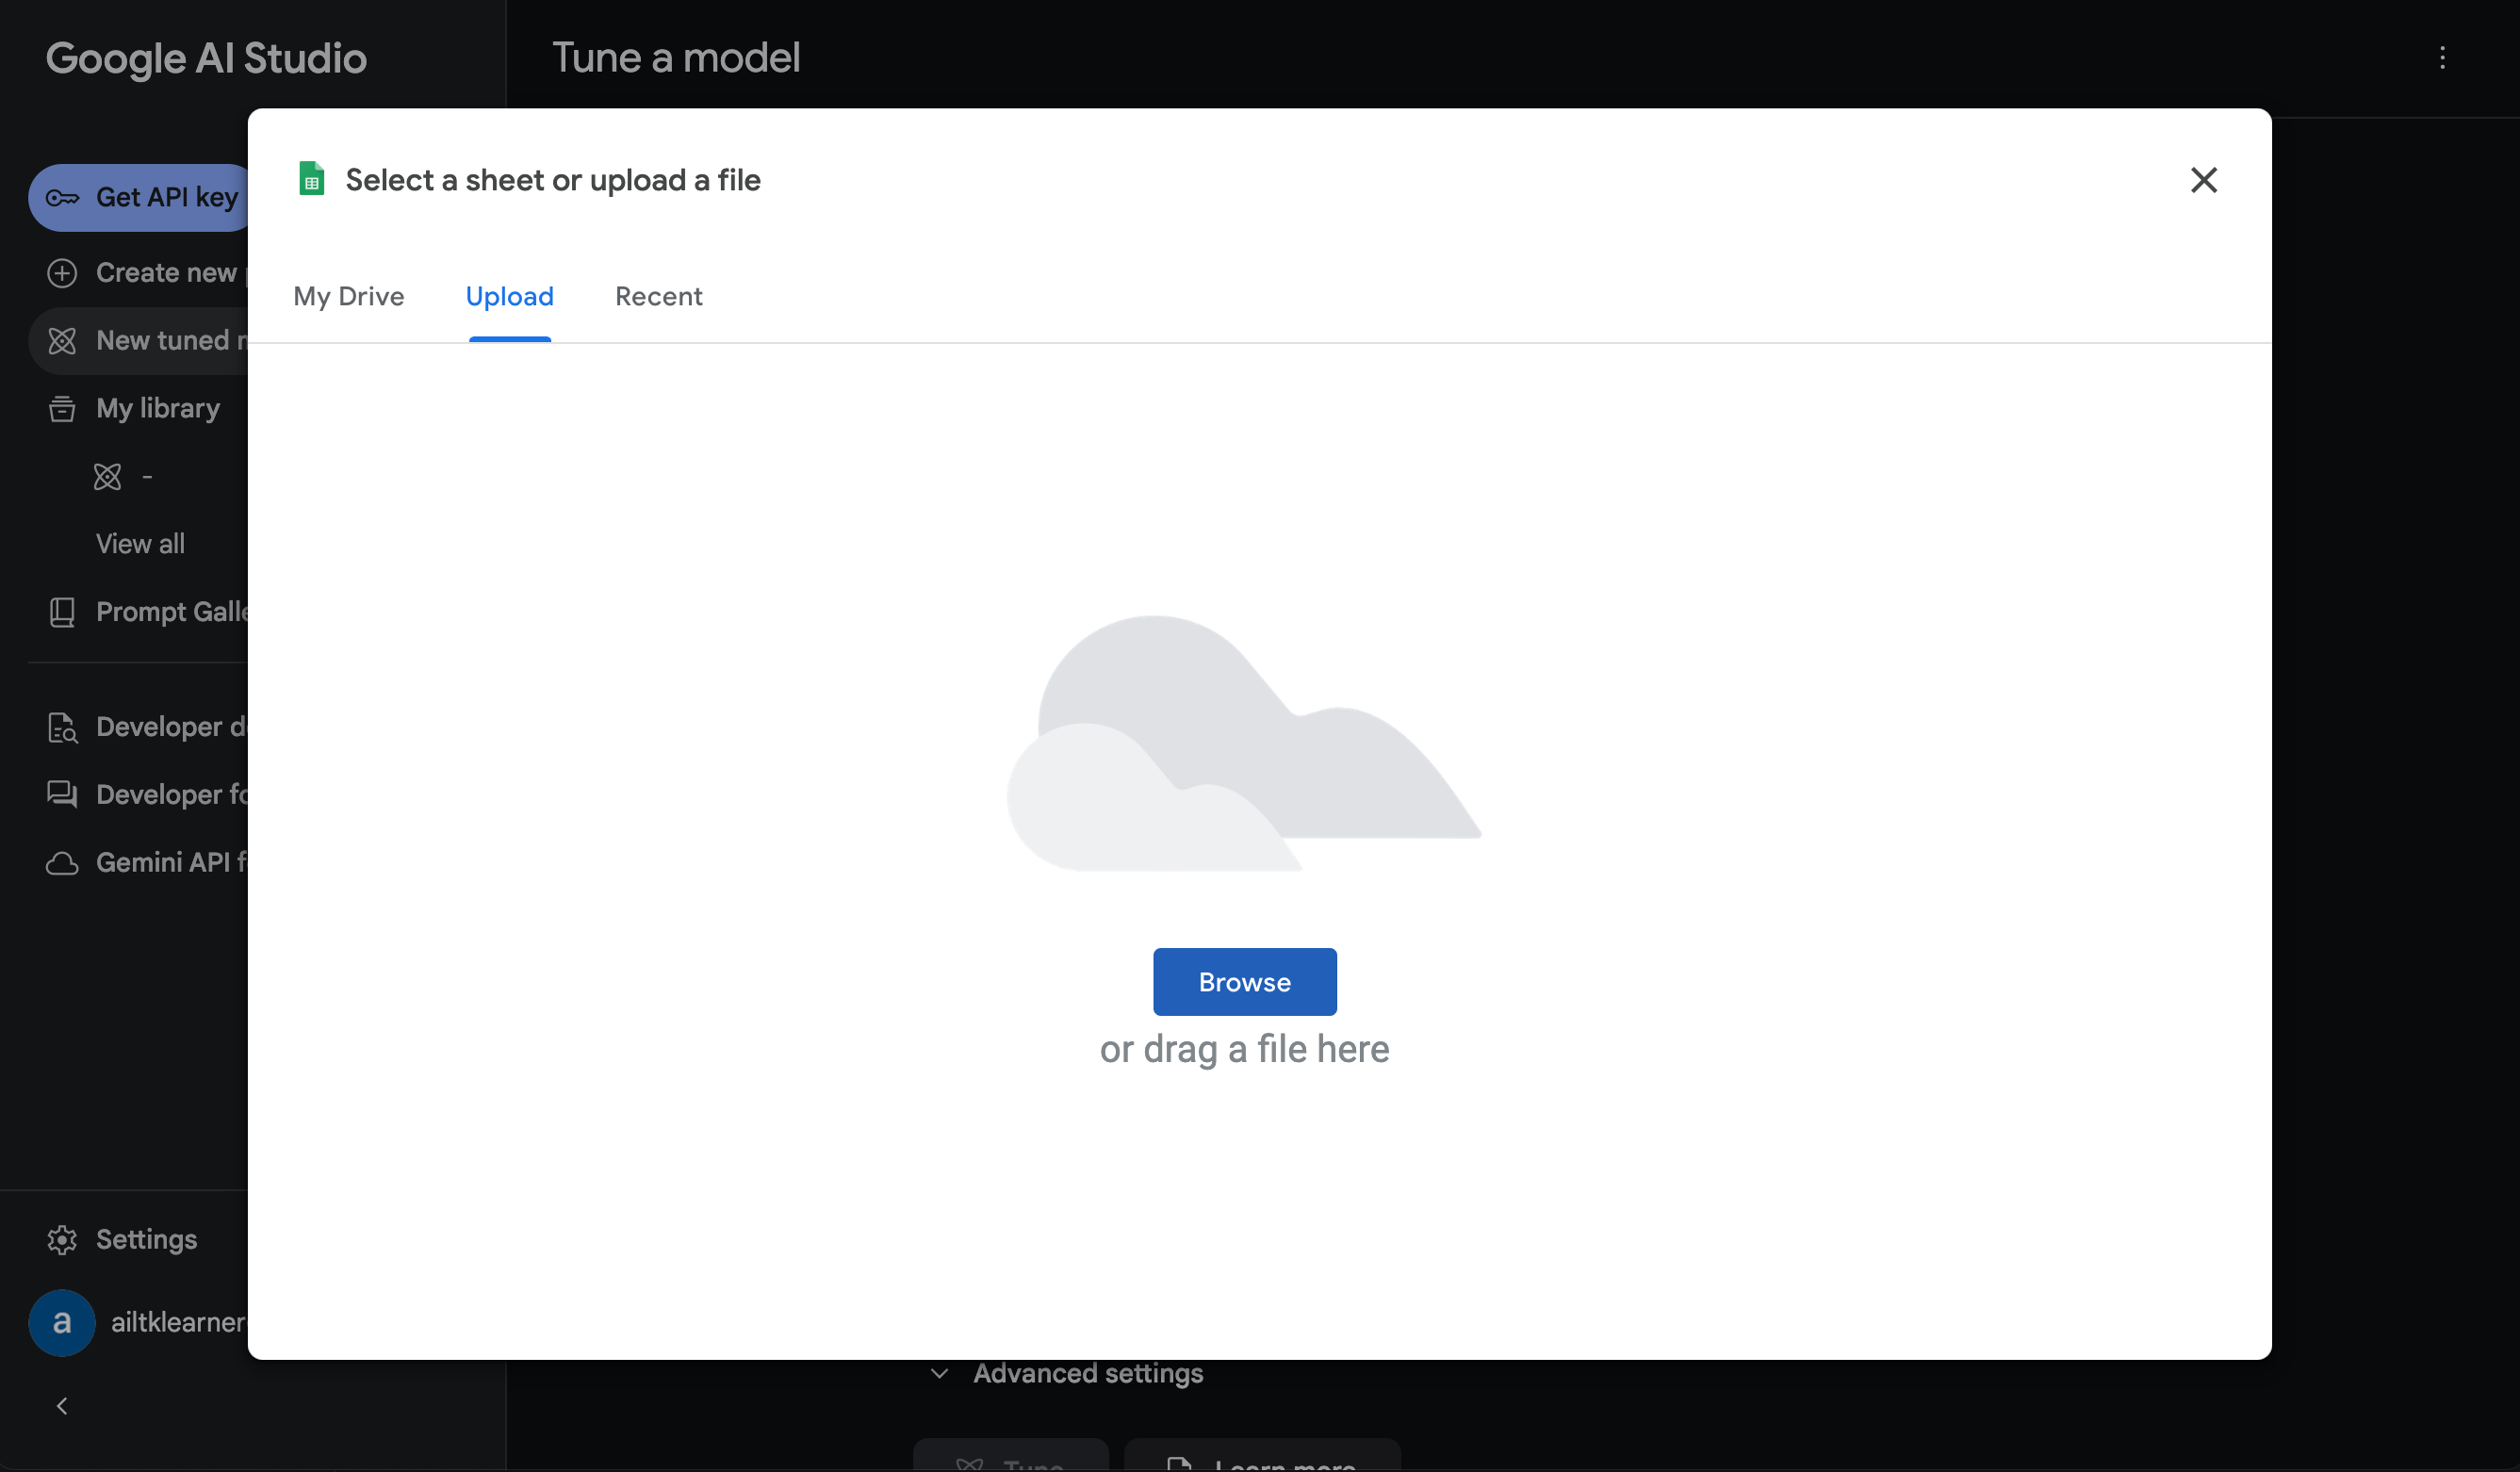

5. Navigate to the directory where your fine-tuning dataset CSV file is. 

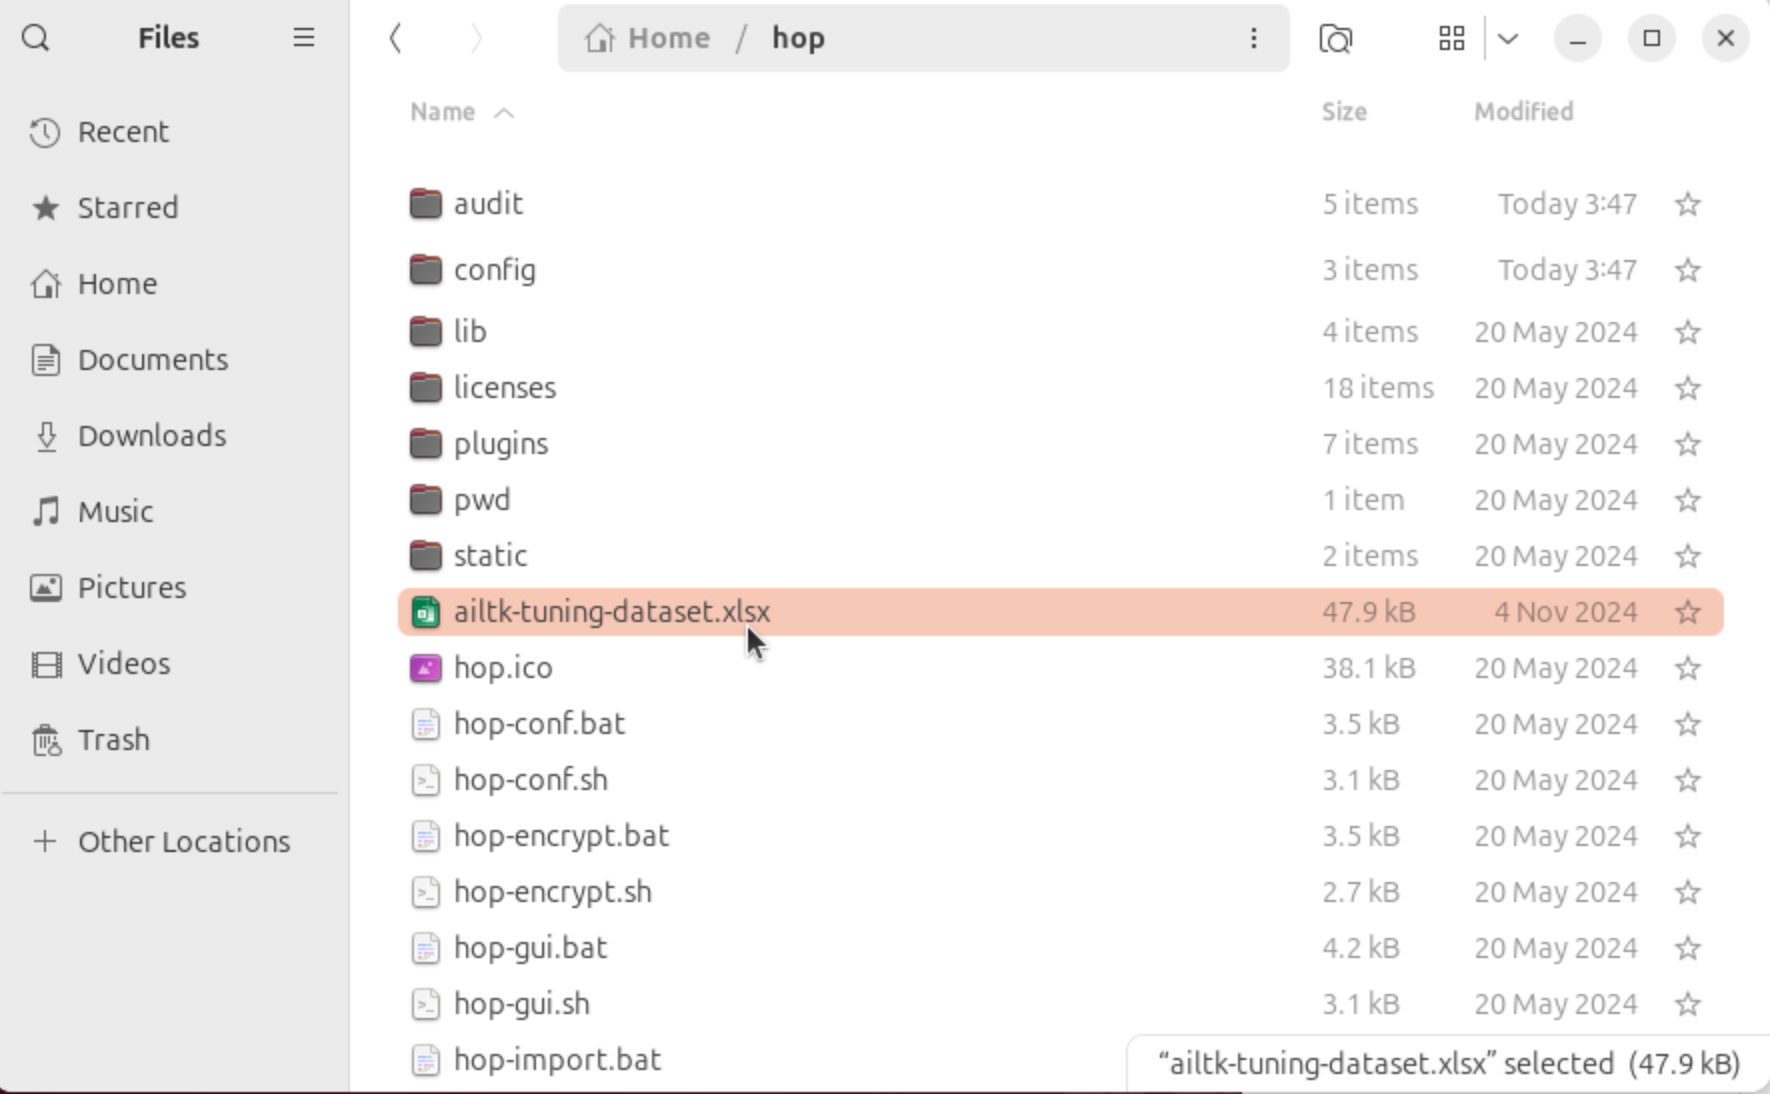

6. When your file is load, you will see the following pop-up:

Click the checkbox for "Use first row as headers" (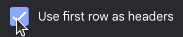).

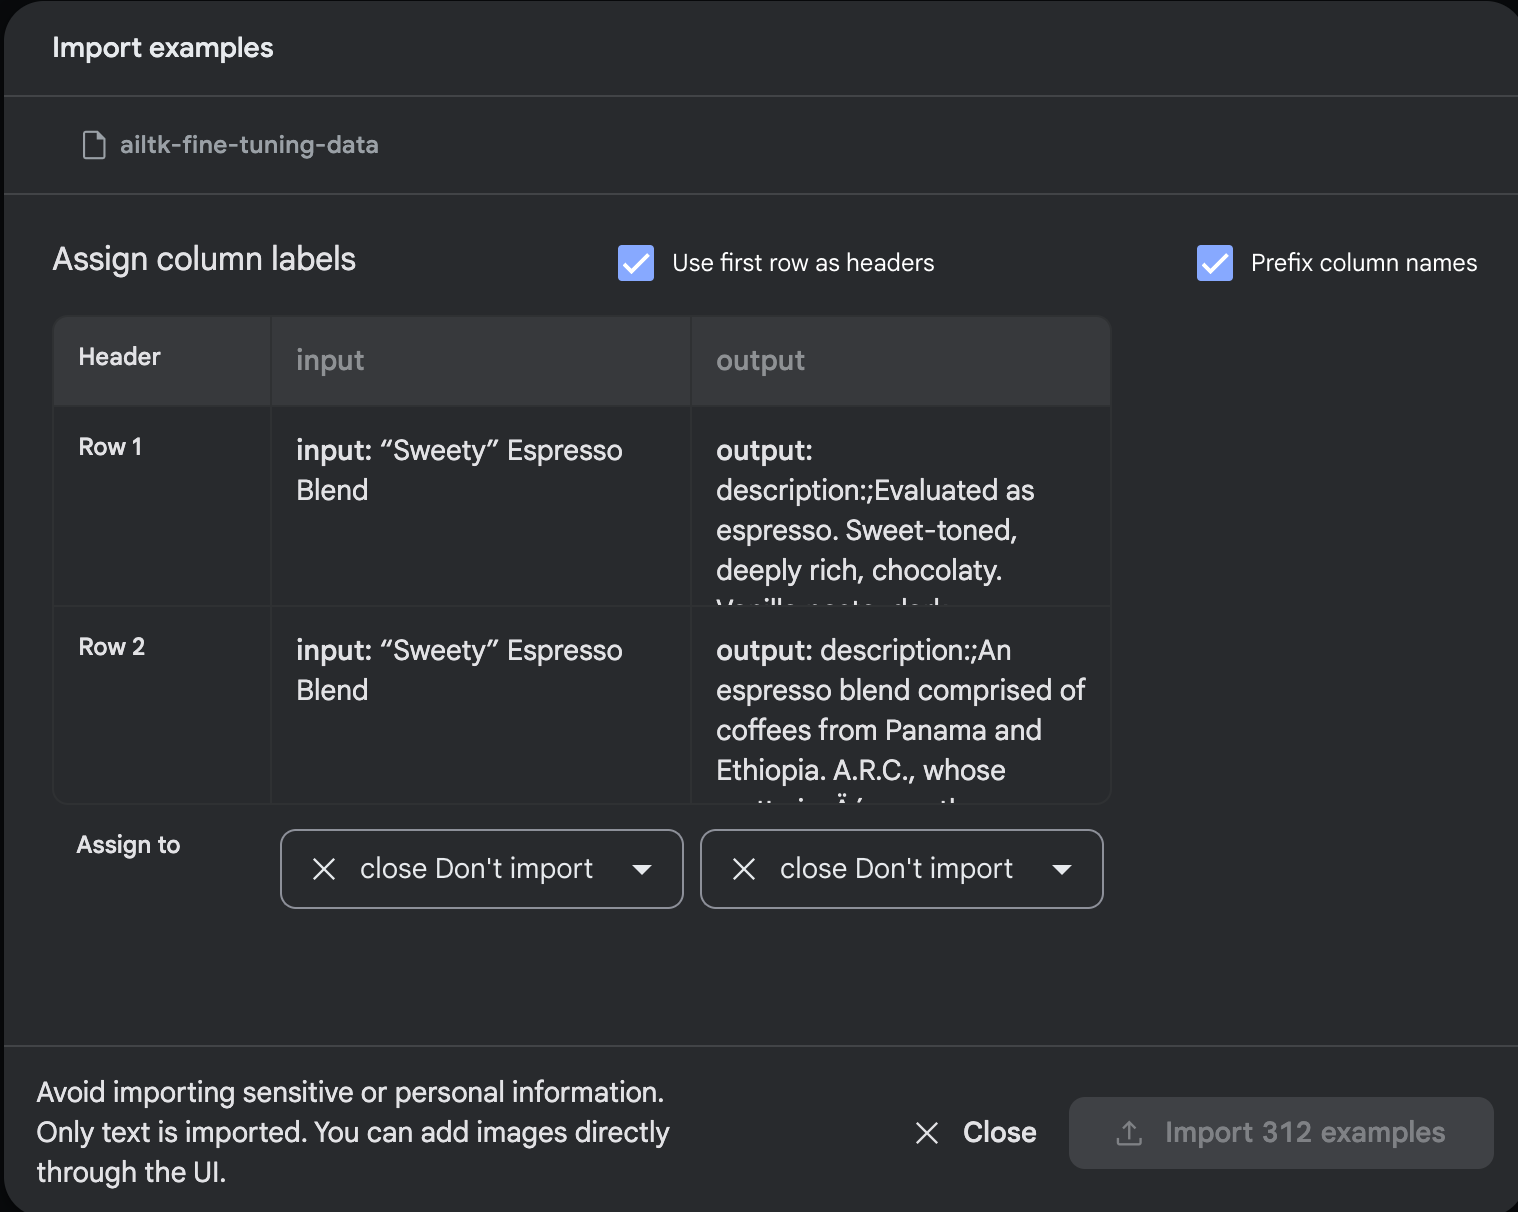



7. In the "Assign to" field, assigh your input and output columns appropriately using the dropdown

    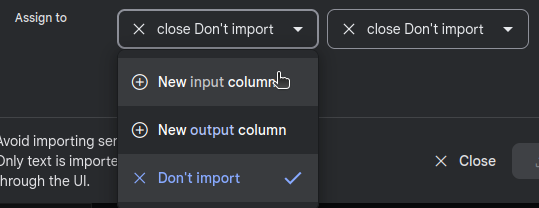

    and afterwards click "Import examples" (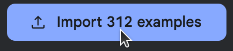).

8. After importing your examples, scroll down and click the button "Tune" (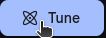).

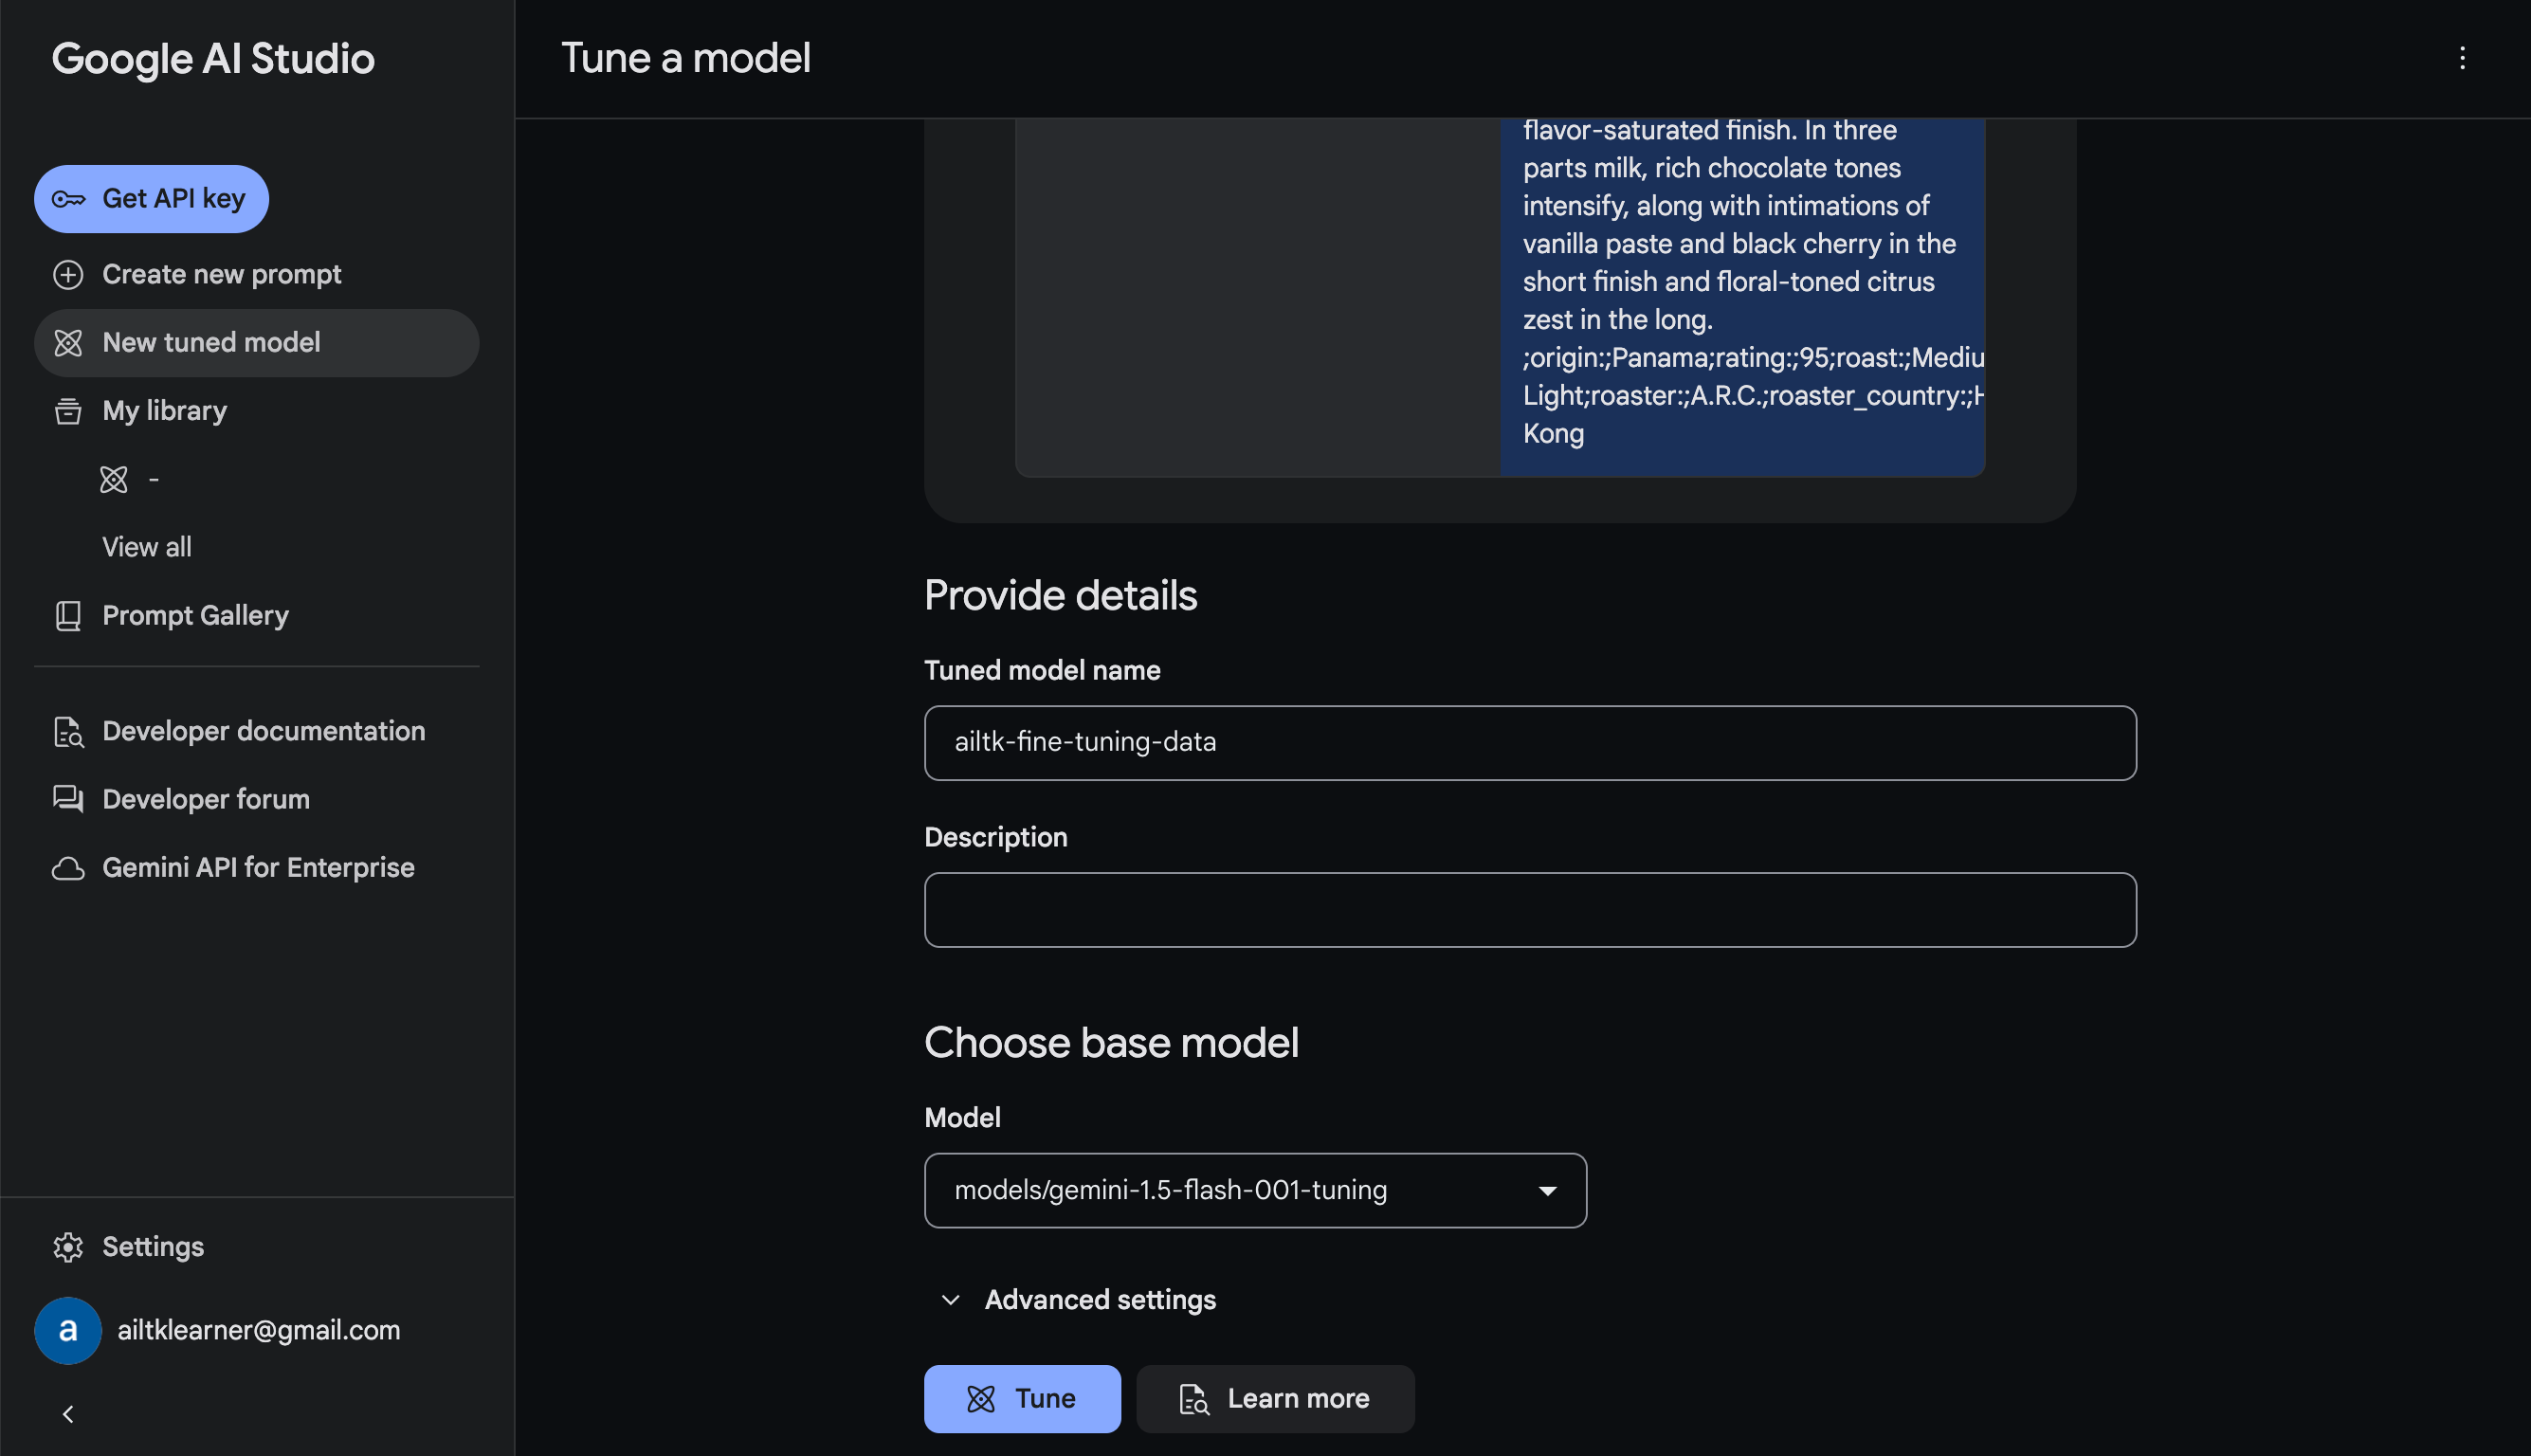

9. Next, you will see that your Tuned model is now "In the queue". Google AI Studio provides a time estimate under "Description" and a progress bar to the rightmost. Tuning your model will take a few minutes. 

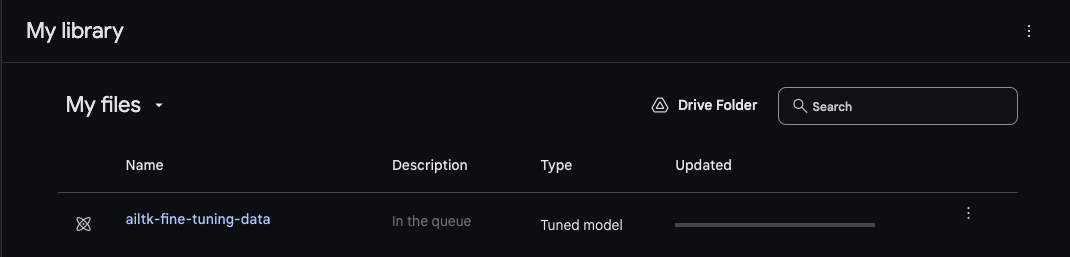

- In the mean time, click on the name of your model so we can take a look at what's happening under the hood. 

    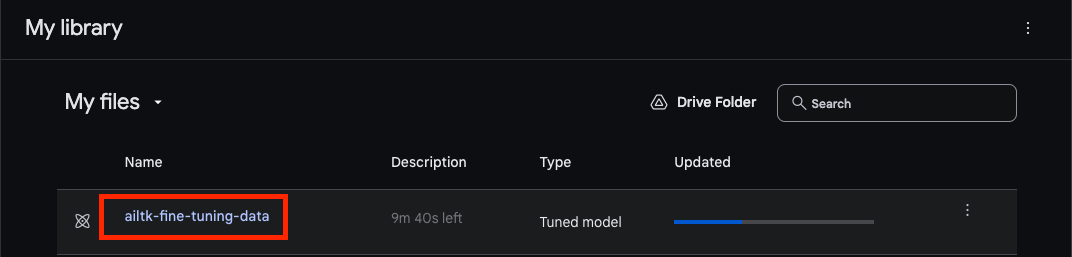


- You will see a dashboard with several figures that. at first, can seem intimidating.
    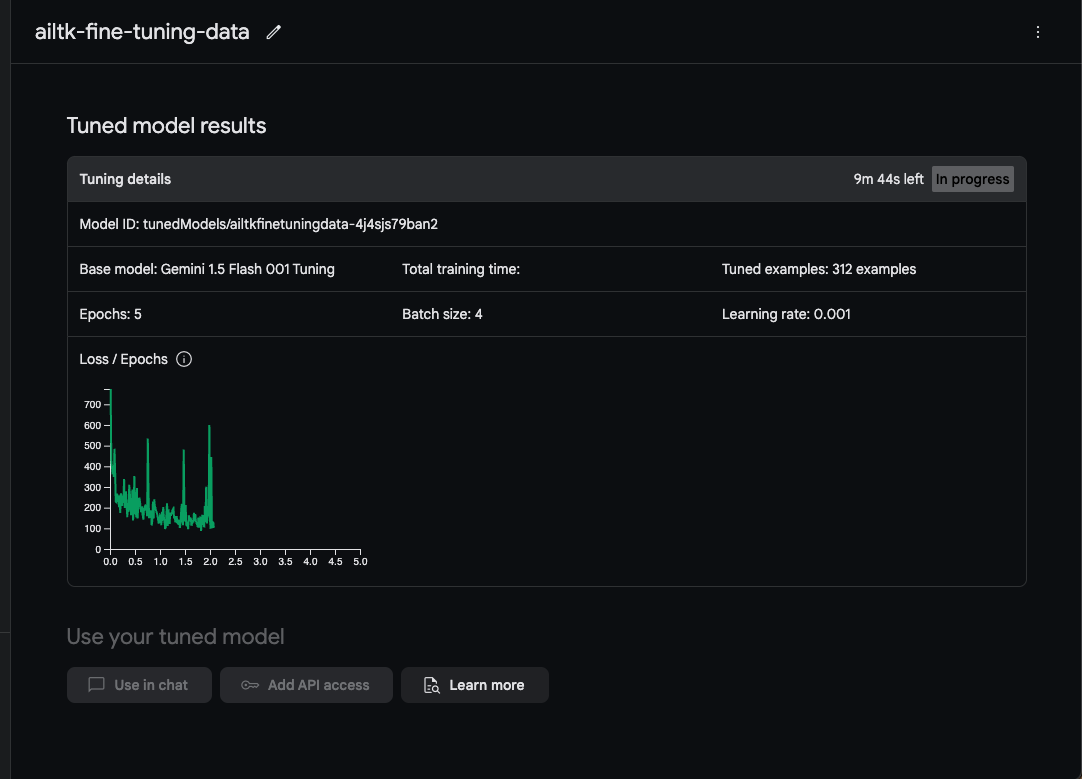
    - But we can break them down in the context of this project to get you started:
        - A. Model Training Workflow

            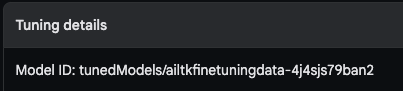 
            - The Model ID is automatically generated by the fine-tuning platform (Google AI Studio, in this case) to represent the specific instance of the fine-tuned model. Fine-tuning adjusts the pre-trained base model to perform better on a specific dataset, tailoring it for a particular use case. In this scenario, the training process involves several key parameters.

            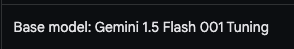
            - The Base Model is a pre-trained Gemini 1.5 Flash O01 serves as the starting point. This model already has vast general knowledge but is now being specialized for our domain specific use-case.

            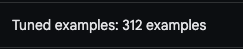
            -  The model is exposed to 312 examples specifically prepared to teach it tasks or domain-specific knowledge from the spreadsheet dataset we came up with through the process of this learning toolkit.

        - B. Several key parameters affect the learning process. While adjusting these parameters can affect how certain models perform on different datasets, the default values provided by Google for their Gemini models will suffice for this toolkit. For now, introducing yourself to them is a great starting point.

            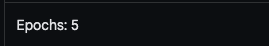
            - Training involves 5 iterations (epochs), where the model processes the entire dataset once per epoch. Each pass allows the model to adjust its weights to minimize errors based on feedback. 

            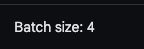
            - Data is split into batches or chunks of size 4 for each training step. This ensures memory efficiency during training, as the model processes smaller amounts of data at a time.

            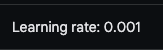
            - The Learning rate value of 0.001 dictates how much the model’s weights adjust with each step. A smaller learning rate ensures stability, avoiding overshooting the optimal solution.

        - C. Loss Function Monitoring

            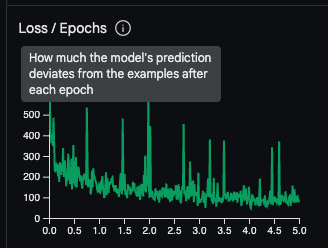
            - The Loss/Epoch graph tracks the performance of the model as it trains. The "loss" quantifies the error in the model’s predictions:
            - Initially, the loss is high as the model starts learning from scratch for the fine-tuning data.
            - Over epochs, the loss decreases, showing that the model is improving and aligning more closely with the desired outputs. This graph is crucial for debugging—if the loss stops decreasing or oscillates steeply, it could indicate issues such as overfitting, underfitting, or a suboptimal learning rate. These concepts will not be gone over in depth in this introductory learning toolkit but may be necessary down the line in your AI development journey.



10. Once it is uploaded, you can interact with your model by clicking the "Use in chat" button (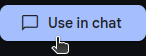).

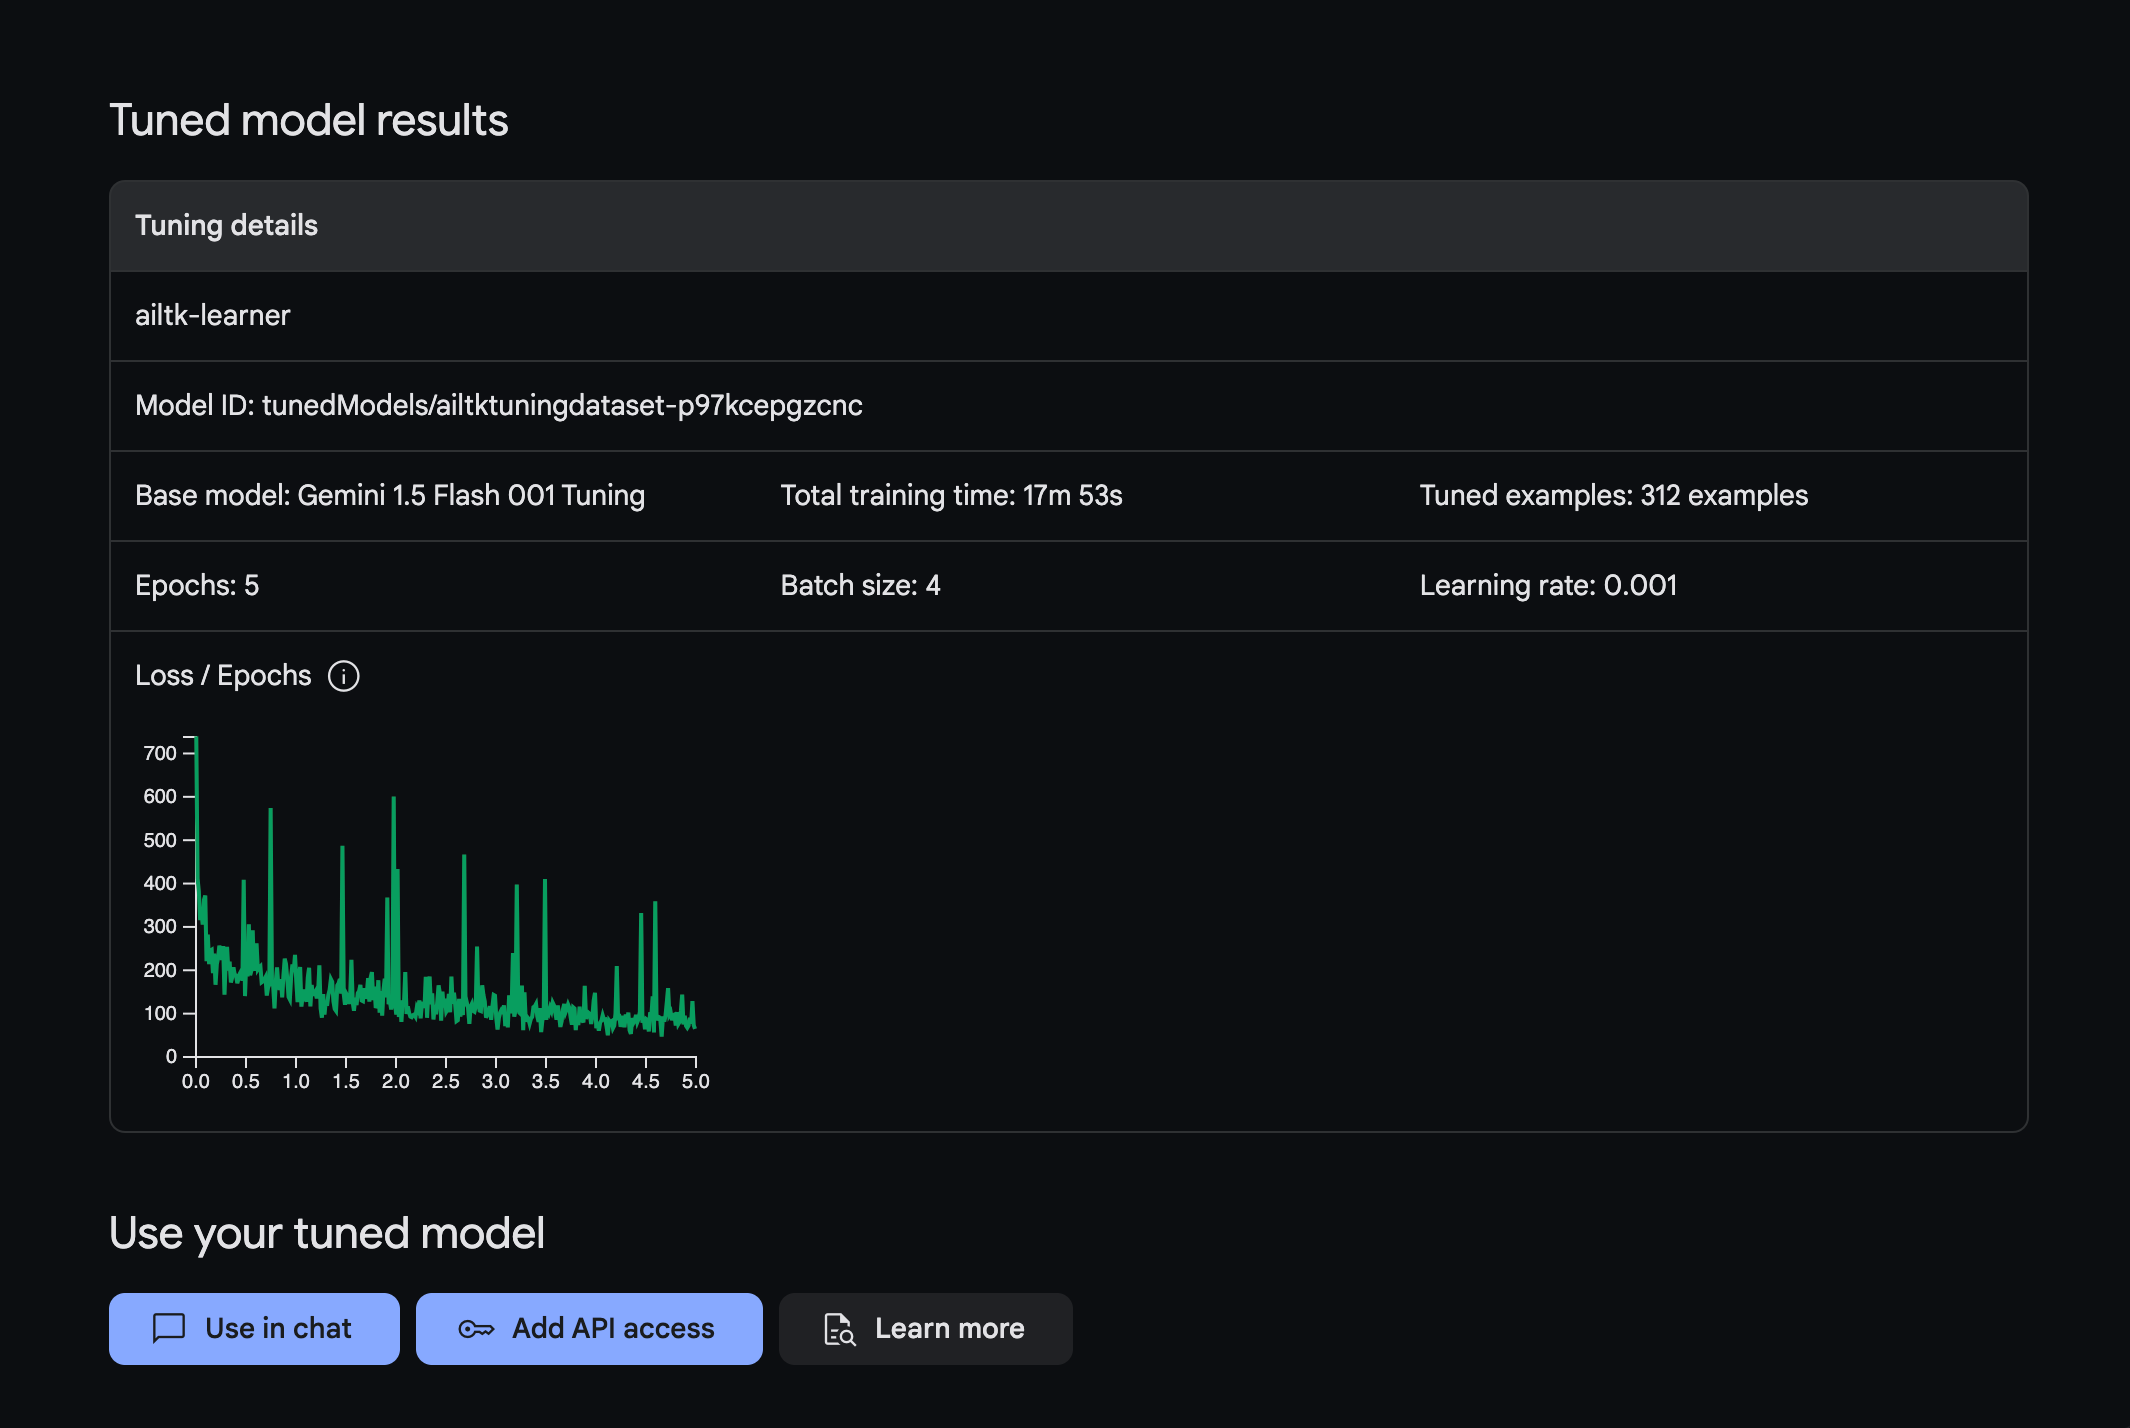

11. Congratulations! You have just fine-tuned your own LLM instance. 

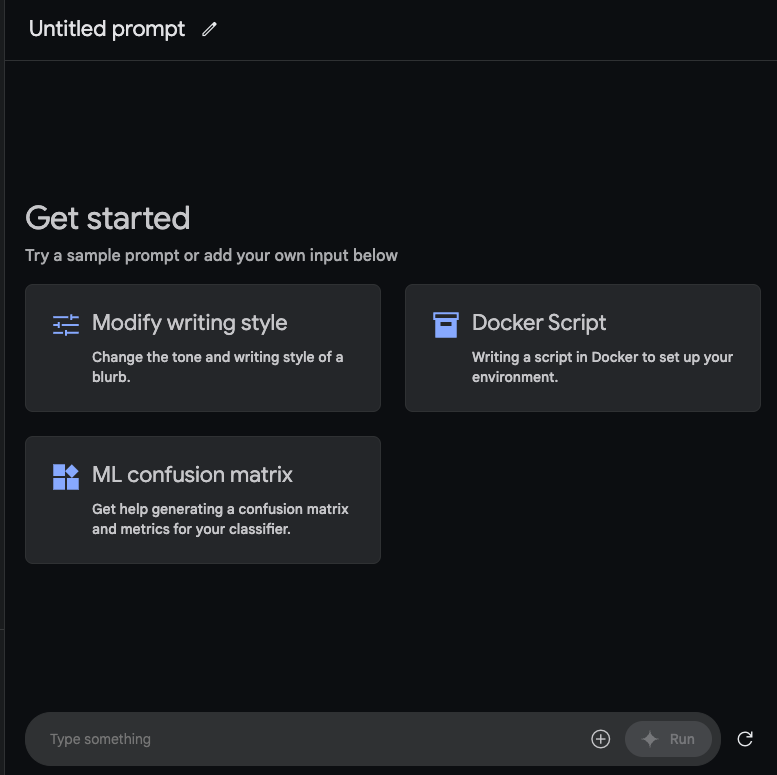

*From working with the case data in Chapters 2 and 3, what information could you ask the newly fine-tuned model to be knowledgable about?*

In [6]:
import ipywidgets as widgets
from IPython.display import display

# Create input text box
input_box2 = widgets.Textarea(
    placeholder='Type your answer here',
    description='Answer:',
    layout=widgets.Layout(width='800px', height='200px')
)

# Create button
submit_button2 = widgets.Button(
    description="Submit",
    button_style='primary',  # Optional: styling
)

# Create output widget
output2 = widgets.Output()

# Define the button click event
def on_submit_click(b):
    # Clear previous output
    output2.clear_output()
    
    # Access the input text and generate an answer
    question = input_box2.value
    answer = f"""
    We can ask about certain products', roast degree and flavor profile. Additionally,we can ask about coffee preparation, brewing
    techniques and product suggestions. Try asking your model now!
    """
    
    # Display the answer in the output widget
    with output2:
        print(answer)

# Set the button's on-click function
submit_button2.on_click(on_submit_click)

# Display the widgets
display(input_box2, submit_button2, output2)

Textarea(value='', description='Answer:', layout=Layout(height='200px', width='800px'), placeholder='Type your…

Button(button_style='primary', description='Submit', style=ButtonStyle())

Output()

Familliar? it has knowledge of the data that we've been working with in the previous two chapters.

Here's the catch however: try asking the LLM some questions about the tasks we first identified in chapter 1. You can try saying a simple "hello" to the model.

Your model will respond similarly to this: ####IMAGE####

While the model is capable of replying and has the domain-specific data we provided, it is yet to understand the task at hand.

We talked a lot about fine tuning, but there's another techinque crucial to the development of our model which you may have already heard of before prior to this learning toolkit, which is **prompt engineering**.

Let's try working backwards. How can we get our model to be able to respond like this:
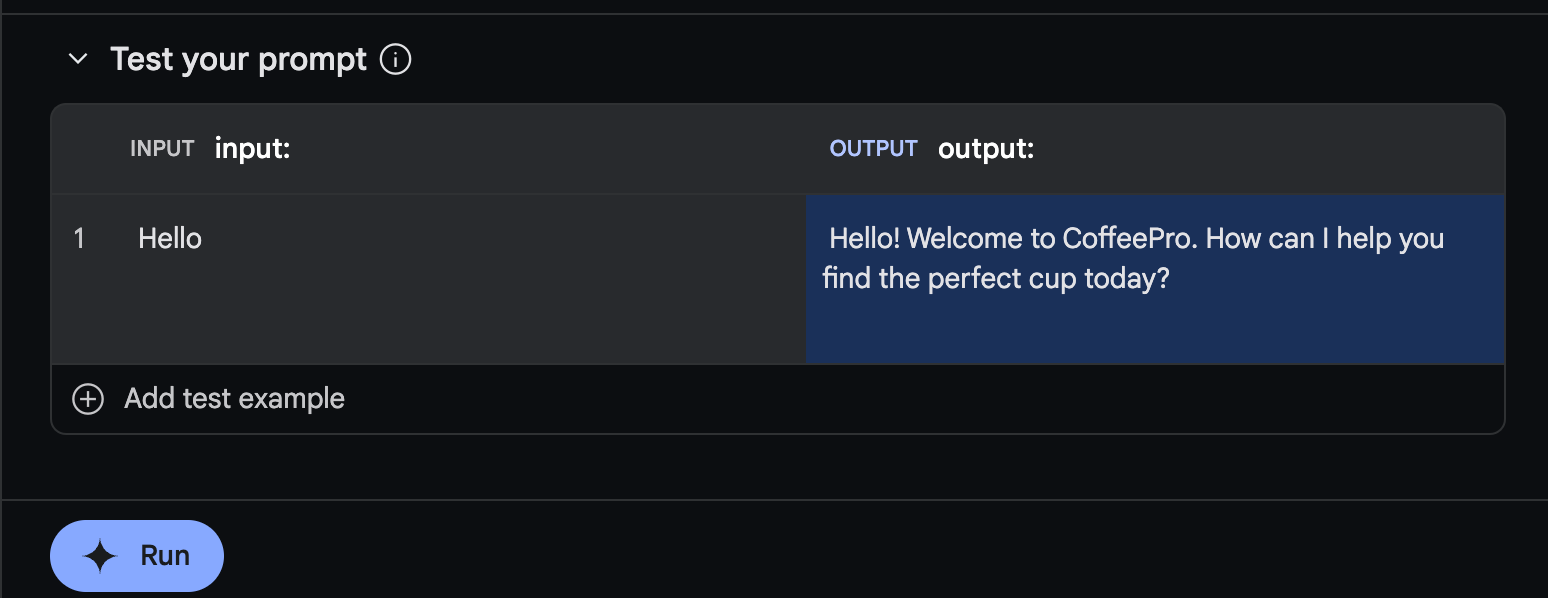

*Try it out yourself: engineer a prompt for your LLM instance.*
    Feel free to revisit <a href="../learning-instructions-4.ipynb" target="_blank">Learning Instructions 4</a>


In [8]:
import ipywidgets as widgets
from IPython.display import display

# Create input text box
input_box2 = widgets.Textarea(
    placeholder='Type your answer here',
    description='Answer:',
    layout=widgets.Layout(width='800px', height='200px')
)

# Create button
submit_button2 = widgets.Button(
    description="Submit",
    button_style='primary',  # Optional: styling
)

# Create output widget
output2 = widgets.Output()

# Define the button click event
def on_submit_click(b):
    # Clear previous output
    output2.clear_output()
    
    # Access the input text and generate an answer
    question = input_box2.value
    answer = f"""
    You are to serve as an AI coffee concierge for a company known as CoffeePro.
    You are fine-tuned on data to give advice about product inquiries and general coffee concerns.
    Focus on the tokens of the user's input that correspond to the data you are fine-tuned on. 
    """
    
    # Display the answer in the output widget
    with output2:
        print(answer)

# Set the button's on-click function
submit_button2.on_click(on_submit_click)

# Display the widgets
display(input_box2, submit_button2, output2)

Textarea(value='', description='Answer:', layout=Layout(height='200px', width='800px'), placeholder='Type your…

Button(button_style='primary', description='Submit', style=ButtonStyle())

Output()

In the next chapter, we will be going over how to evaluate its performance on use cases via the API key and improve model performance with prompt engineering.